In [1]:
import pyspark
from pyspark.sql import SparkSession
from pyspark.sql import functions as F

from pyspark.ml.clustering import KMeans
from pyspark.ml.evaluation import ClusteringEvaluator
from pyspark.ml.feature import VectorAssembler

from pyspark.ml.functions import vector_to_array
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
spark = SparkSession.builder.appName('Customer Segmentation').getOrCreate()
spark

In [3]:
df_market = spark.read.option('header', 'true').csv('2019-Nov.csv')

In [4]:
df_market.printSchema()

root
 |-- event_time: string (nullable = true)
 |-- event_type: string (nullable = true)
 |-- product_id: string (nullable = true)
 |-- category_id: string (nullable = true)
 |-- category_code: string (nullable = true)
 |-- brand: string (nullable = true)
 |-- price: string (nullable = true)
 |-- user_id: string (nullable = true)
 |-- user_session: string (nullable = true)



In [5]:
df_market = df_market.withColumn("price", df_market["price"].cast("float"))

In [6]:
data = df_market.groupBy("user_id", "event_type").agg(F.avg('price'), F.count('user_id'))

In [7]:
data = data.filter(F.col('count(user_id)') <= 5000)

In [8]:
vectorAssembler = VectorAssembler(inputCols=["avg(price)", "count(user_id)"], outputCol="features")
vectored_df = vectorAssembler.transform(data)

In [9]:
kmeans = KMeans(featuresCol="features").setK(5).setSeed(1)
model = kmeans.fit(vectored_df)

pred = model.transform(vectored_df)

evaluator = ClusteringEvaluator()

eval = evaluator.evaluate(pred)
print("Squared Euclidean Distance = " + str(eval))

centers = model.clusterCenters()
print("Cluster Centers: ")
for center in centers:
    print(center)

Squared Euclidean Distance = 0.7312082180450973
Cluster Centers: 
[111.57446772  12.41635437]
[783.81450394  11.79396527]
[2070.96101881    3.24892348]
[1333.41323223    6.13548104]
[360.31209589  17.51943967]


In [10]:
x = np.array(pred.withColumn("seperated_features", vector_to_array("features")).select([F.col("seperated_features")[i] for i in range(2)]).collect())
y = np.array(pred.select("prediction").collect())


In [11]:
graphData = np.hstack((x, y))

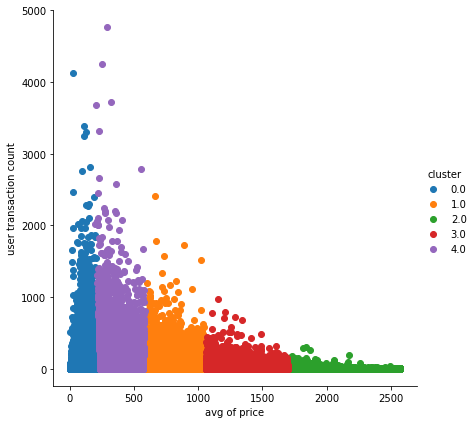

In [12]:
graph_df = pd.DataFrame(data = graphData, columns=("avg of price", "user transaction count", "cluster"))
sns.FacetGrid(graph_df, hue="cluster", height=6).map(plt.scatter, "avg of price", "user transaction count").add_legend()
plt.show()

In [13]:
pred.groupBy("prediction").count().show()

+----------+-------+
|prediction|  count|
+----------+-------+
|         1| 539676|
|         3| 154863|
|         4|1428801|
|         2|  18114|
|         0|2822100|
+----------+-------+



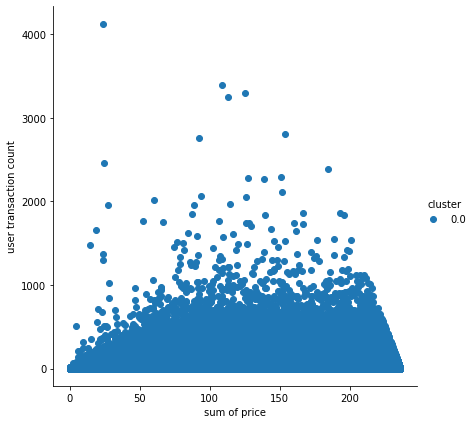

In [14]:
graphData1 = graphData[graphData[:,2] == 0]
graph_df1 = pd.DataFrame(data = graphData1, columns=("sum of price", "user transaction count", "cluster"))
sns.FacetGrid(graph_df1, hue="cluster", height=6).map(plt.scatter, "sum of price", "user transaction count").add_legend()
plt.show()

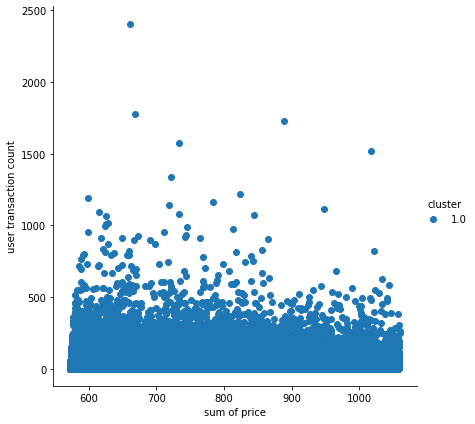

In [15]:
graphData2 = graphData[graphData[:,2] == 1]
graph_df2 = pd.DataFrame(data = graphData2, columns=("sum of price", "user transaction count", "cluster"))
sns.FacetGrid(graph_df2, hue="cluster", height=6).map(plt.scatter, "sum of price", "user transaction count").add_legend()
plt.show()

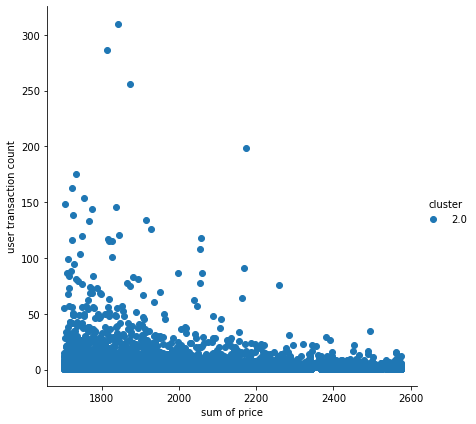

In [16]:
graphData3 = graphData[graphData[:,2] == 2]
graph_df3 = pd.DataFrame(data = graphData3, columns=("sum of price", "user transaction count", "cluster"))
sns.FacetGrid(graph_df3, hue="cluster", height=6).map(plt.scatter, "sum of price", "user transaction count").add_legend()
plt.show()

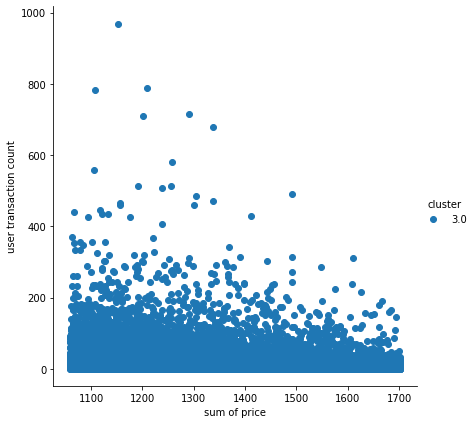

In [17]:
graphData4 = graphData[graphData[:,2] == 3]
graph_df4 = pd.DataFrame(data = graphData4, columns=("sum of price", "user transaction count", "cluster"))
sns.FacetGrid(graph_df4, hue="cluster", height=6).map(plt.scatter, "sum of price", "user transaction count").add_legend()
plt.show()

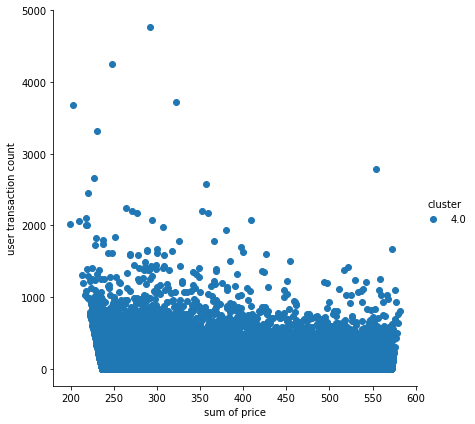

In [18]:
graphData5 = graphData[graphData[:,2] == 4]
graph_df5 = pd.DataFrame(data = graphData5, columns=("sum of price", "user transaction count", "cluster"))
sns.FacetGrid(graph_df5, hue="cluster", height=6).map(plt.scatter, "sum of price", "user transaction count").add_legend()
plt.show()